# **CELL-PHONE PRICE RANGE PREDICTION**

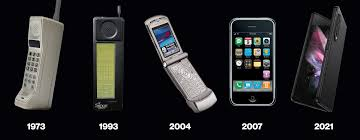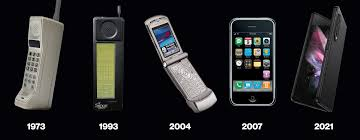

# BUSINESS CASE:

**Find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price.
In this problem you do not have to predict the actual price but a price range indicating how high the price is.**



## IMPORTING THE PYHTON LIBRARIES

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load Dataset
pd.set_option('display.max_columns',None)
data=pd.read_csv("datasets_11167_15520_train.csv")

In [ ]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## DOMAIN ANALYSIS

  #### INPUT VARIABLES :

* battery_power = Total energy a battery can store in one time measured in mAh(Continuous)
* blue = Has bluetooth or not (Categorical)
* clock_speed = speed at which microprocessor executes instructions(Continuous)
* dual_sim = Has dual sim support or not (Categorical)
* fc = Front Camera mega pixels(Continuous)
* four_g = Has 4G or not (Categorical)
* int_memory = Internal Memory in Gigabytes(Continuous)
* m_dep = Mobile Depth in cm(Continuous)
* mobile_wt = Weight of mobile phone(Continuous)
* n_cores = Number of cores of processor(Continuous)
* pc = Primary Camera mega pixels(Continuous)
* px_height = Pixel Resolution Height(Continuous)
* px_weight = Pixel Resolution Weight(Continuous)
* ram = Random Access Memory in Megabytes(Continuous)
* sc_h = Screen Height of mobile in cm(Continuous)
* sc_w = Screen Width of mobile in cm(Continuous)
* talk_time = longest time that a single battery charge will last when you are(Continuous)
* three_g = Has 3G or not (Categorical)
* touch_screen = Has touch screen or not (Categorical)
* wifi = Has wifi or not(Categorical)

#### OUTPUT VARIABLE 

* Price Range = This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## BASIC CHECKS

In [ ]:
# First 5 records of dataset
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# last 5 records of dataset
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# data type of each column
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
# column names in dataset
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# statistical analysis
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### CHECK THE CATEGORICAL COLUMNS

In [ ]:
# fetching categorical columns
cat_cols=data[['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']]

In [ ]:
# Stastical Analysis
cat_cols.mode()

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi
0,0,1,1,4,1,1,1


In [ ]:
# finding unique values and value counts of categorical columns
cat_cols=data[['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']]
for col in cat_cols:
    print("Column Name:",col)
    print("unique values:",data[col].unique())
    print("value counts:\n",data[col].value_counts())
    print("***********************************")


Column Name: blue
unique values: [0 1]
value counts:
 0    1010
1     990
Name: blue, dtype: int64
***********************************
Column Name: dual_sim
unique values: [0 1]
value counts:
 1    1019
0     981
Name: dual_sim, dtype: int64
***********************************
Column Name: four_g
unique values: [0 1]
value counts:
 1    1043
0     957
Name: four_g, dtype: int64
***********************************
Column Name: n_cores
unique values: [2 3 5 6 1 8 4 7]
value counts:
 4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64
***********************************
Column Name: three_g
unique values: [0 1]
value counts:
 1    1523
0     477
Name: three_g, dtype: int64
***********************************
Column Name: touch_screen
unique values: [0 1]
value counts:
 1    1006
0     994
Name: touch_screen, dtype: int64
***********************************
Column Name: wifi
unique values: [1 0]
value counts:
 1    1014
0     986
Name: wifi, 

In [ ]:
# fetch continuous columns based on above graph
con_cols=data[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

In [ ]:
# Stastical Analysis
con_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


### INSIGHTS:

* sc_w, fc, pc, px_height, these columns shows minimum value 0. so it seems like these columns has corrupted values.


### CHECK NORMALITY OF COLUMNS 

In [ ]:
# check distribution continous data
# checking normality of columns
from scipy import stats

con_cols=data[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

for i in con_cols:
    stat, p = stats.normaltest(data[i])
    print("\n**********************************************\n")
    if p > 0.05:
        print(f"{i} column appears to be normally distributed")
    else:
        print(f"{i} column does not appear to be normally distributed")



**********************************************

battery_power column does not appear to be normally distributed

**********************************************

clock_speed column does not appear to be normally distributed

**********************************************

fc column does not appear to be normally distributed

**********************************************

int_memory column does not appear to be normally distributed

**********************************************

m_dep column does not appear to be normally distributed

**********************************************

mobile_wt column does not appear to be normally distributed

**********************************************

pc column does not appear to be normally distributed

**********************************************

px_height column does not appear to be normally distributed

**********************************************

px_width column does not appear to be normally distributed

******************************

In [ ]:
con_cols=['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
for i in con_cols:
    print("column Name:",i)
    print("skewness   :  ",data[i].skew())
    print("kurtosis   :  ",data[i].kurtosis())
    print("*********************")

column Name: battery_power
skewness   :   0.03189847179278164
kurtosis   :   -1.2241438831965528
*********************
column Name: clock_speed
skewness   :   0.1780841202790887
kurtosis   :   -1.3234172221019123
*********************
column Name: fc
skewness   :   1.0198114105315519
kurtosis   :   0.2770763245651877
*********************
column Name: int_memory
skewness   :   0.05788932785206039
kurtosis   :   -1.2160740301516093
*********************
column Name: m_dep
skewness   :   0.08908200979245855
kurtosis   :   -1.2743488835633268
*********************
column Name: mobile_wt
skewness   :   0.006558157428692449
kurtosis   :   -1.2103764737553446
*********************
column Name: pc
skewness   :   0.017306150471392553
kurtosis   :   -1.1714987948421944
*********************
column Name: px_height
skewness   :   0.6662712560691598
kurtosis   :   -0.3158654936040146
*********************
column Name: px_width
skewness   :   0.014787473768006081
kurtosis   :   -1.186005229243282
*

# EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

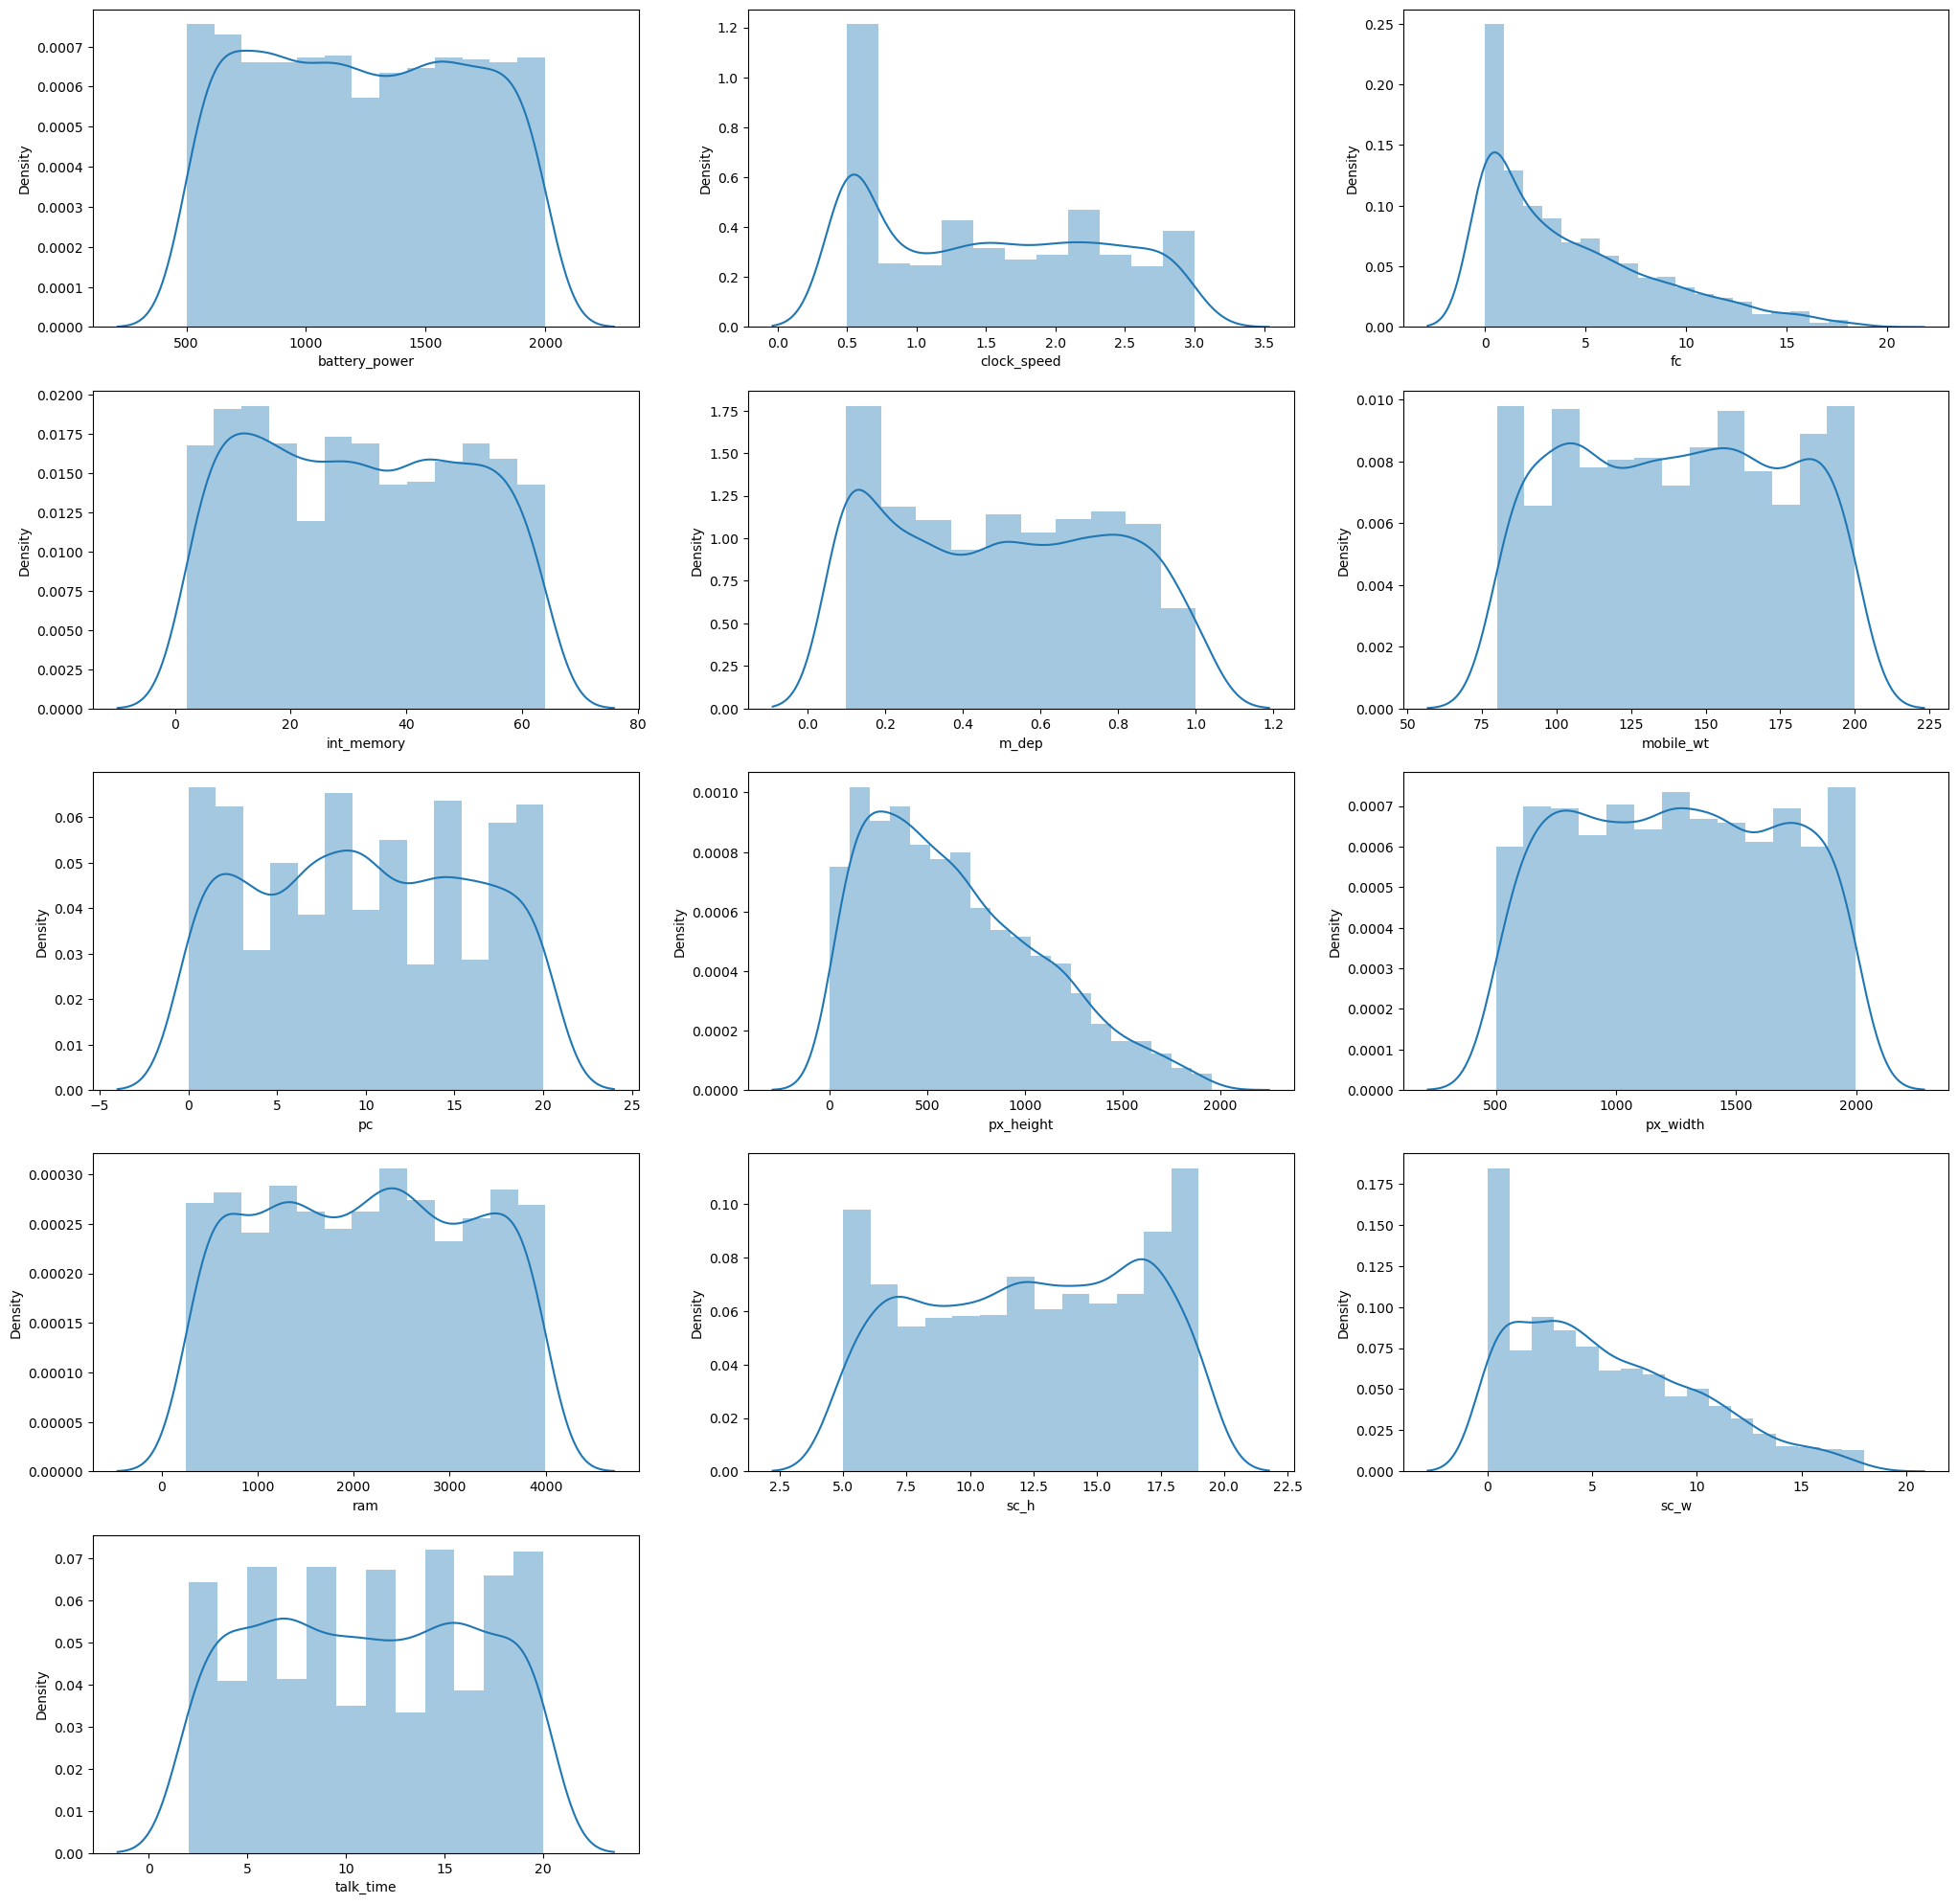

In [ ]:
# Visualization
con_cols=data[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
plt.figure(figsize=(25,25))
num=1
for i in con_cols:
    if num<=14:
        plt.subplot(5,3,num)
        sns.distplot(x=data[i])
        plt.xlabel(i)
    num+=1


## INSIGHTS:
* None of the column is normally distributed.
* Distribution of fc,px_height,sc_w columns is left skewed.
* Distribution battery_power,clock_width,int_memory,m_dep,mobile_wt,pc,px_width,ram,sc_h,sc_w,talk_time columns has flat kurtosis

<Axes: xlabel='price_range', ylabel='count'>

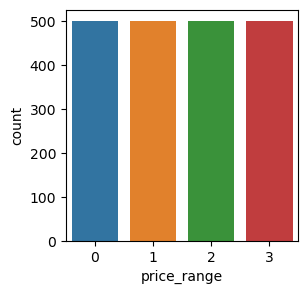

In [ ]:
# check data balance
plt.figure(figsize=(3,3))
sns.countplot(x=data['price_range'])

### INSIGHTS:
* data is balanced

### BIVARIATE ANALYSIS

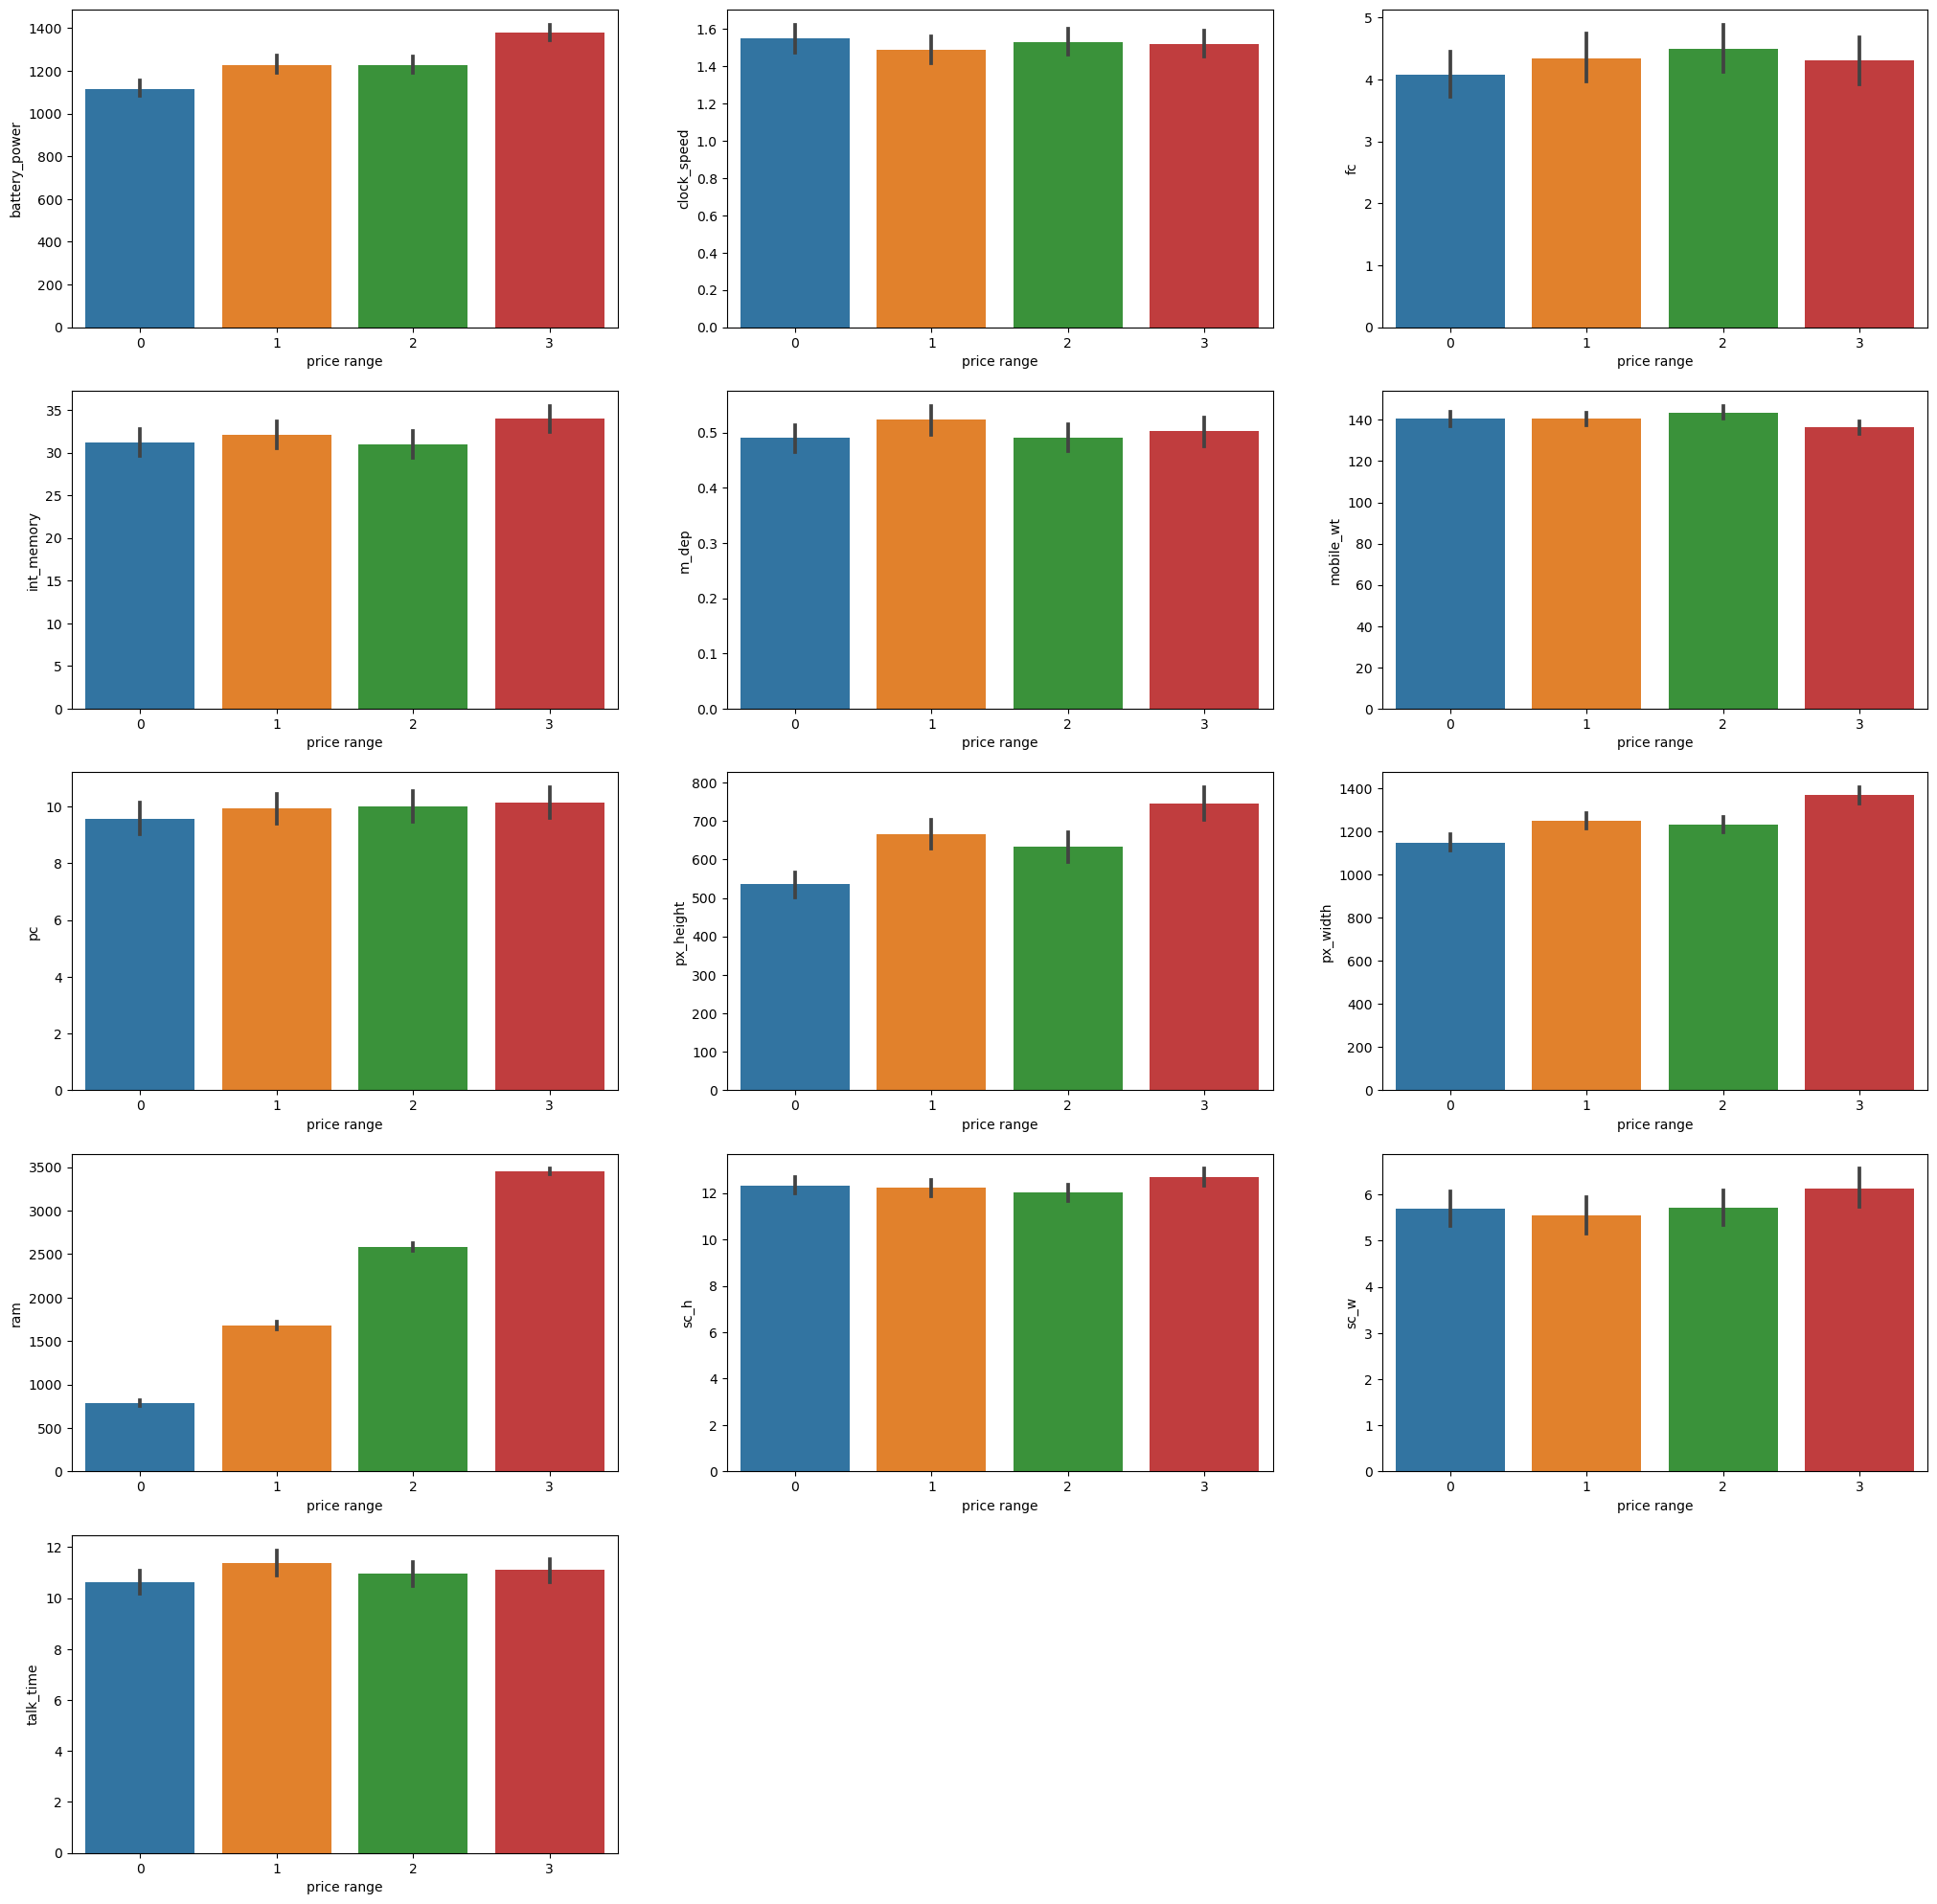

In [ ]:
# corelation of continuous variable with target
con_cols=data[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
plt.figure(figsize=(25,25))
num=1
for i in con_cols:
    if num<=14:
        plt.subplot(5,3,num)
        sns.barplot(x=data['price_range'], y=data[i])
        plt.xlabel('price range')
    num+=1


### INSIGHTS:
* Battery Power variable has correlation with target variable price range as battery power increases price of phone increases.
* internal memory variable has correlation with target variable price range as internal memory increases price of phone increases.
* px_width and px_height variable has correlation with target variable price range as px_width and px_height increases price of phone increases.
* ram has strong correlation with target variable as ram price of phone increases.
* primary camera also shows some corelation with target.
* 'clock_speed', 'fc','m_dep', 'mobile_wt', 'sc_h', 'sc_w', 'talk_time' does not have any corelation with increasing price of phone

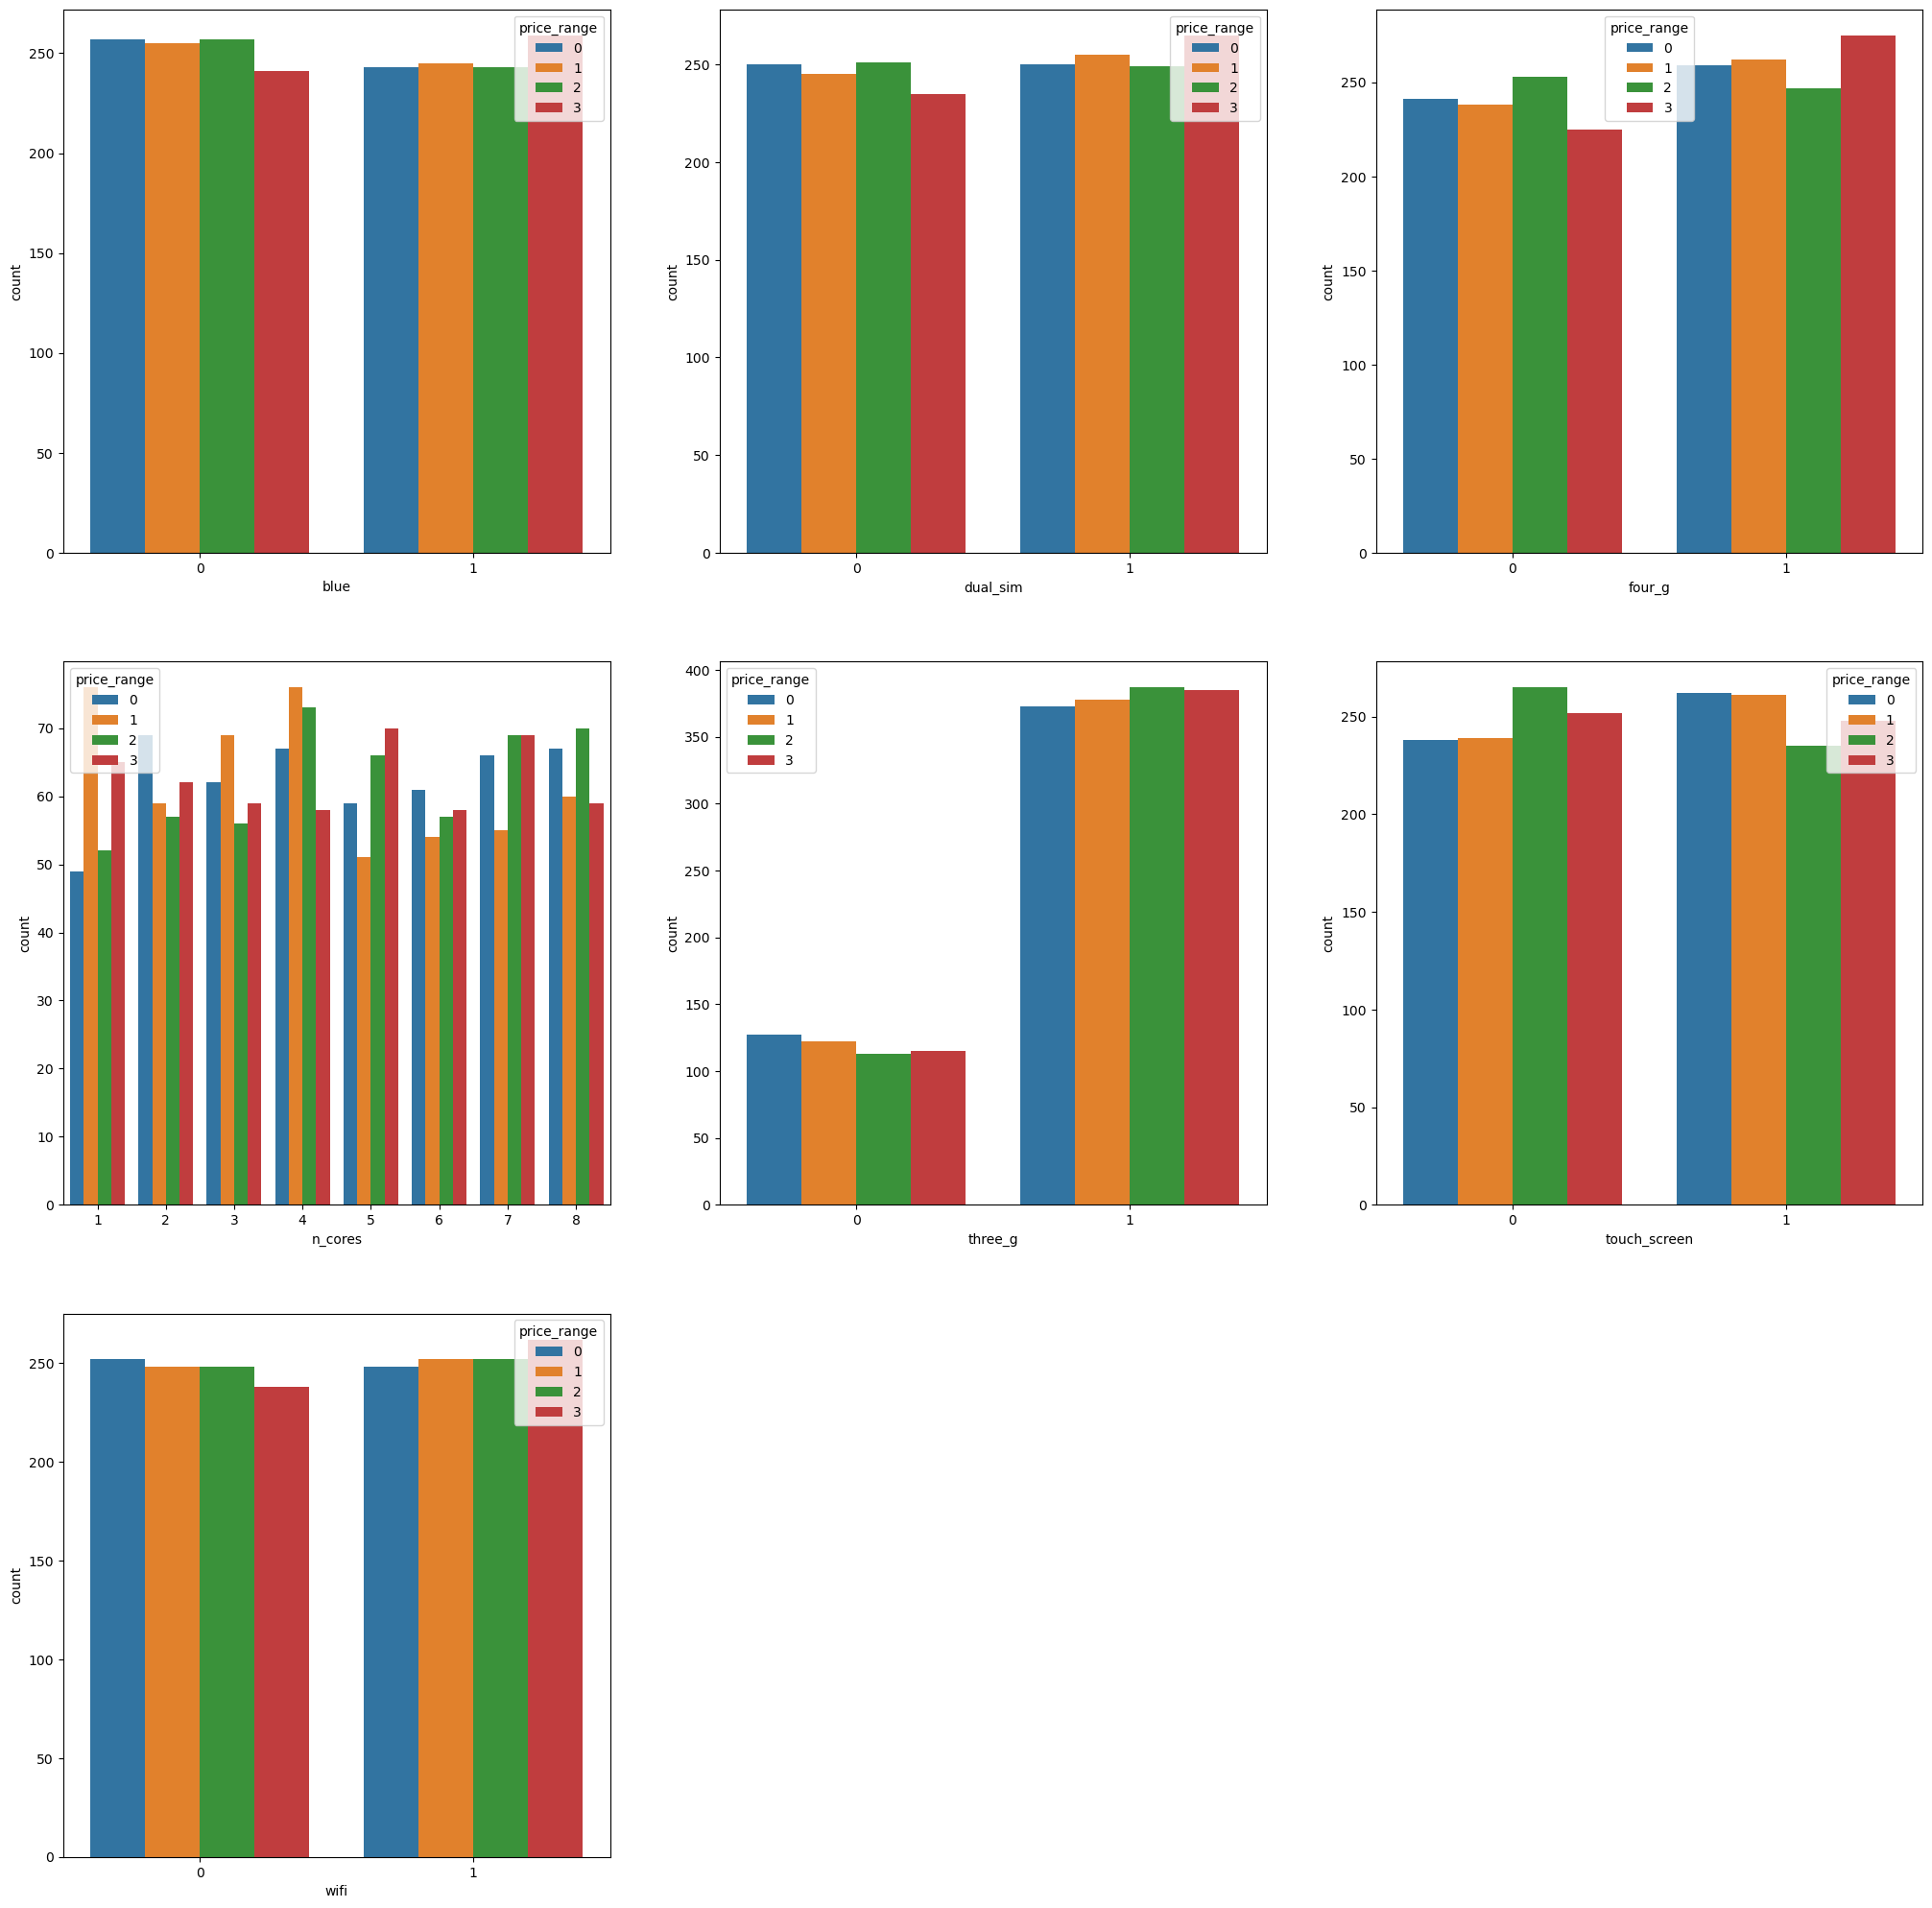

In [ ]:
# corelation of categorical variable with target
cat_cols=data[['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']]
plt.figure(figsize=(25,25))
num=1
for i in cat_cols:

    if num<=7:
        plt.subplot(3,3,num)
        sns.countplot(x=data[i],hue=data['price_range'])
        plt.xlabel(i)
    num+=1

* blue, dual_sim, n_cores, touch_screen, wifi has no correlation with target
* three_g and four_g has correlation with target

### MULTIVARIATE ANALYSIS

<Axes: >

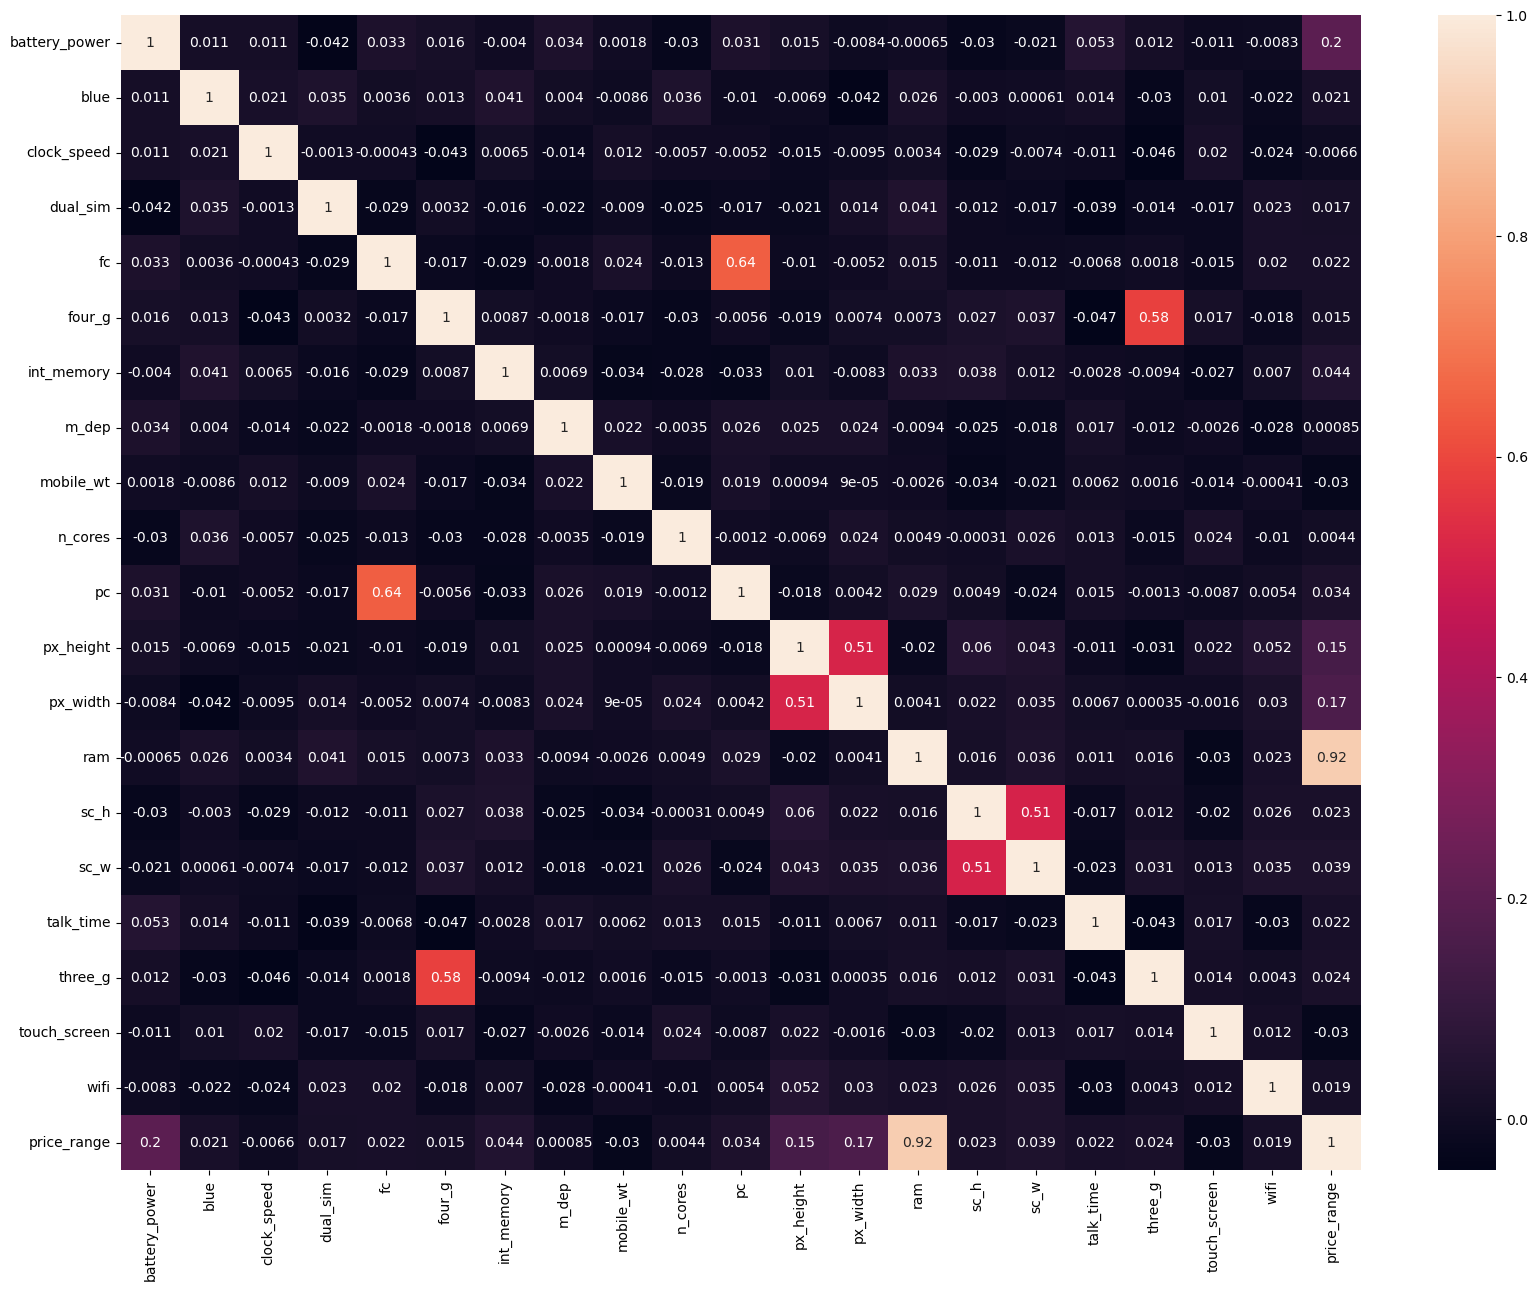

In [ ]:
plt.figure(figsize = [20, 15])
sns.heatmap(data.corr(),annot=True)

## DATA PRE-PROCESSING

**CHECK NULL VALUES**

In [ ]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**check duplicates**

In [ ]:

data.duplicated().sum()

0

## CHECK OUTLIERS

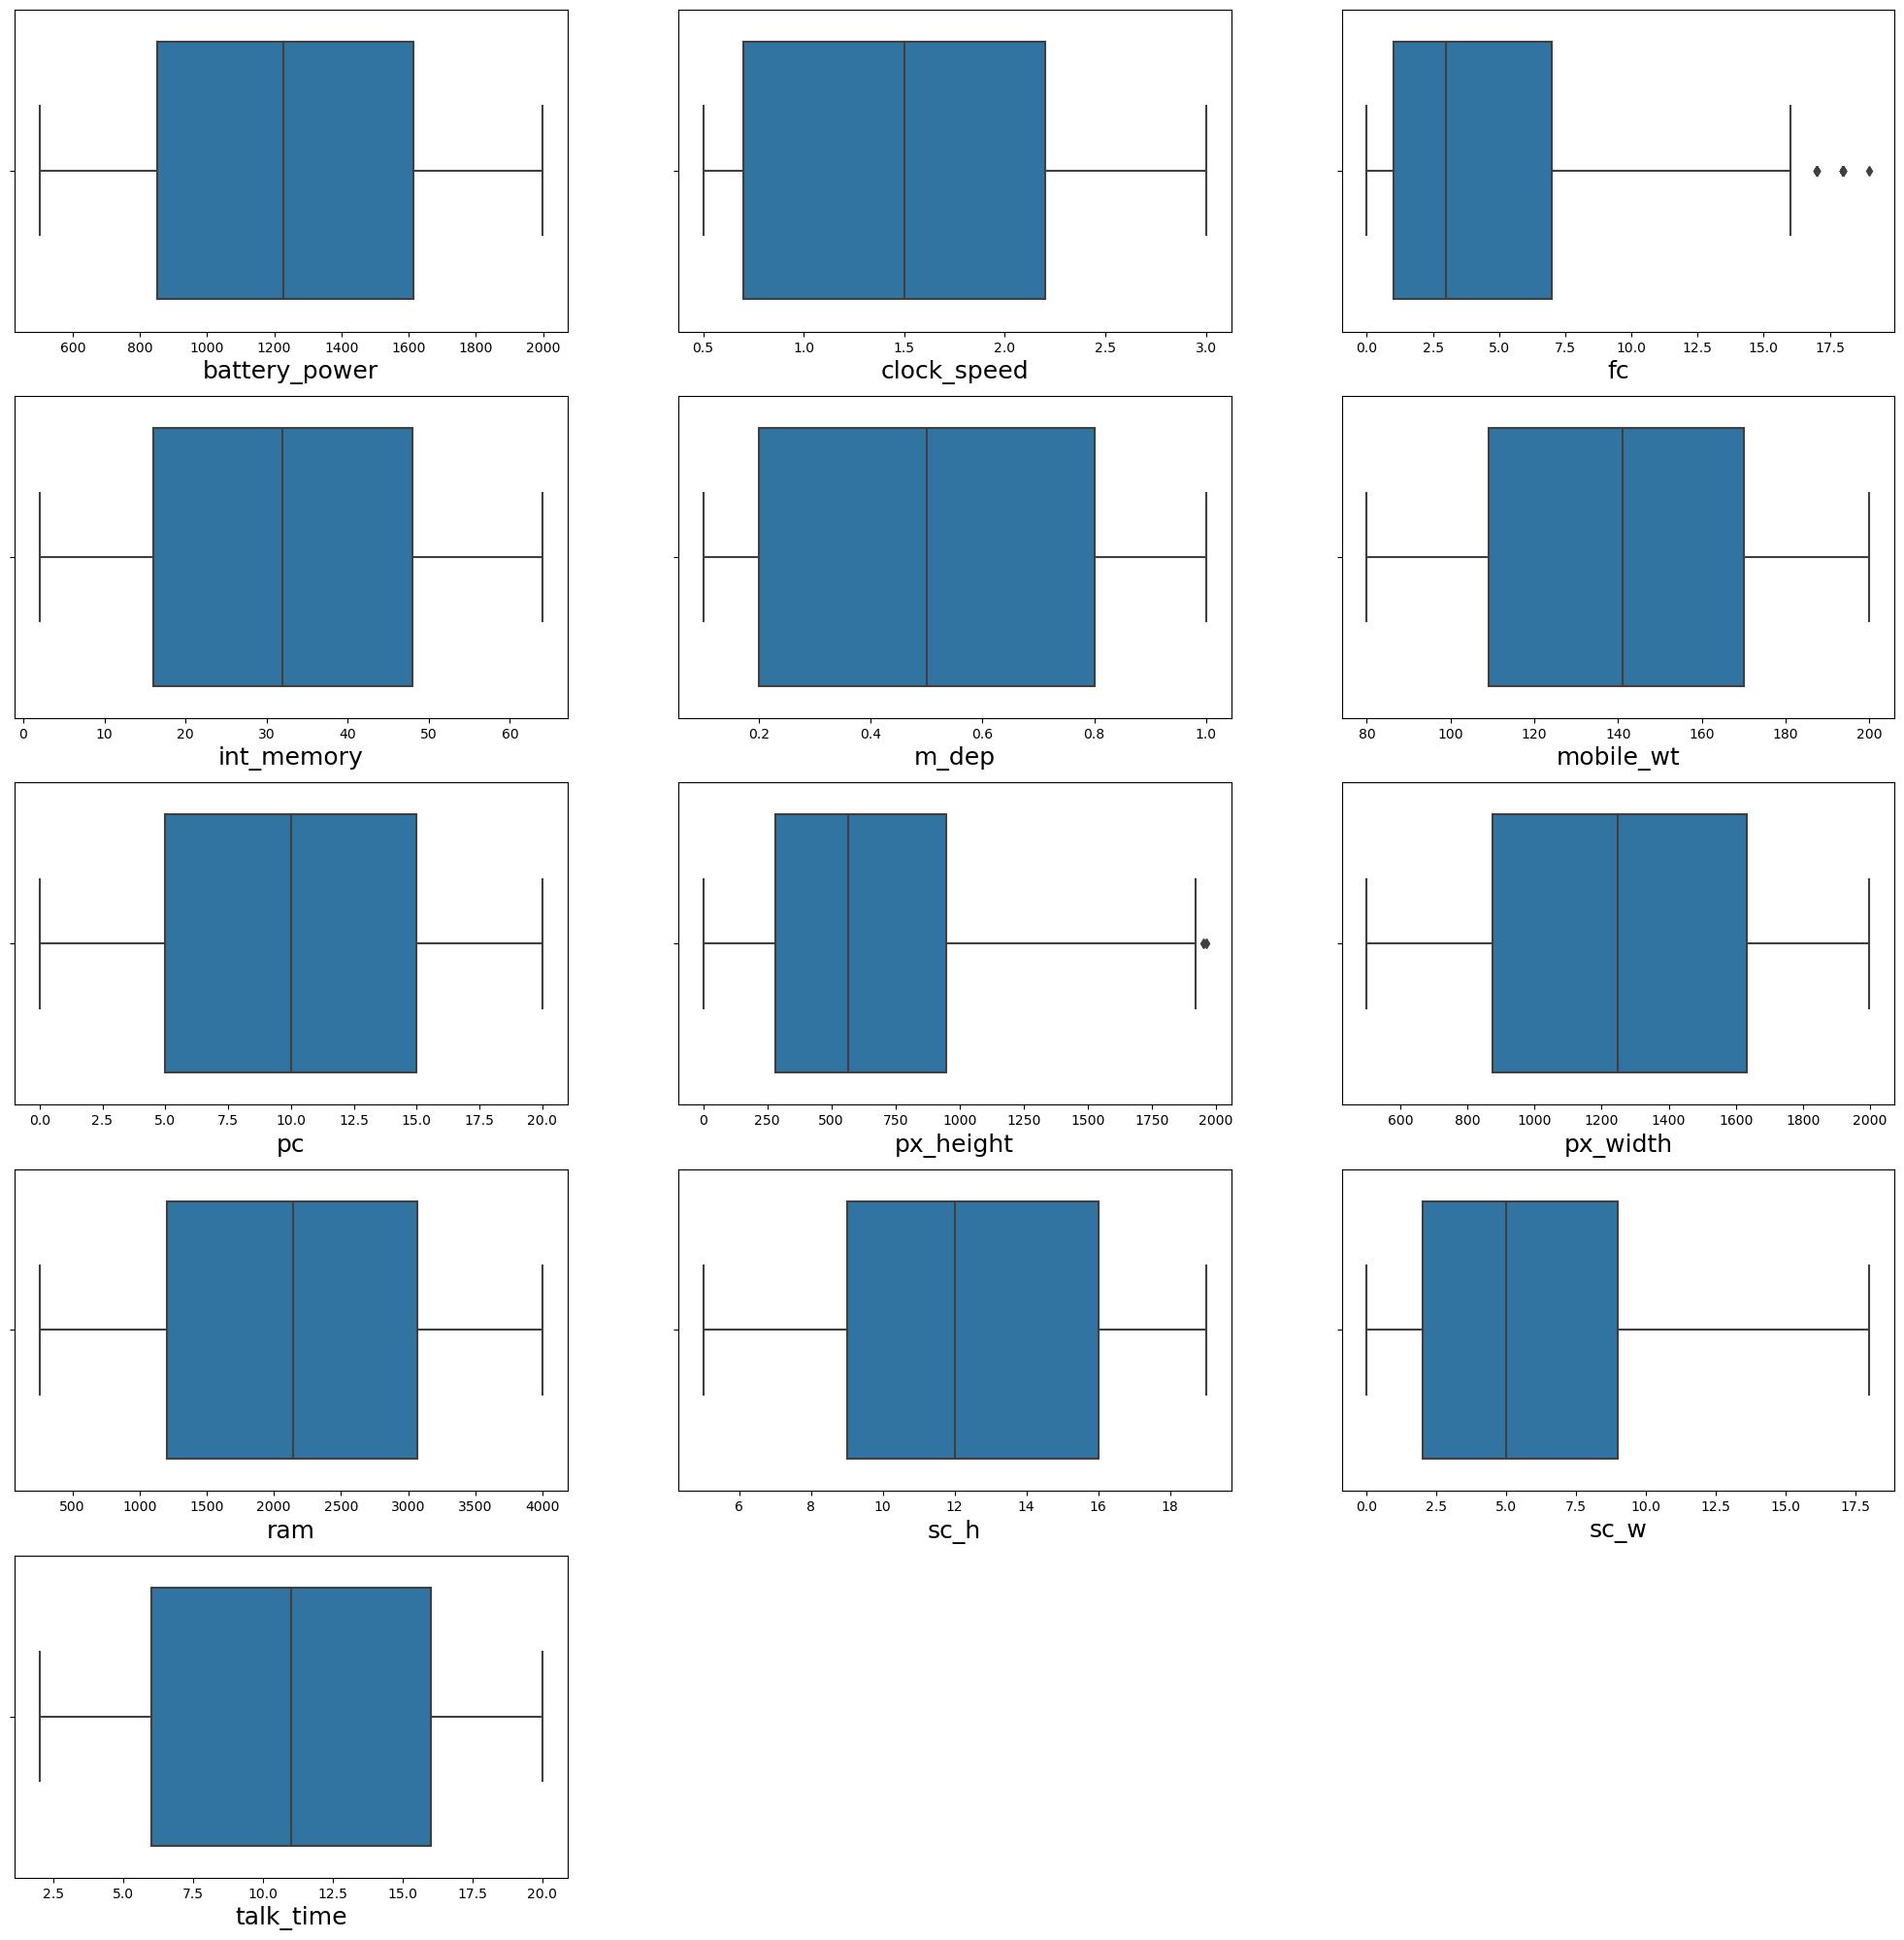

In [ ]:

con_cols=data[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
plt.figure(figsize=(25,25))
num=1
for col in con_cols:
    if num<=15:
        plt.subplot(5,3,num)
        sns.boxplot(x=con_cols[col])
        plt.xlabel(col,fontsize=18)
    num+=1

### HANDLING OUTLIERS

In [ ]:

# px_height column
q1=data['px_height'].quantile(0.25)
q3=data['px_height'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
per=len(data.loc[(data['px_height']<lower)|(data['px_height']>upper)])/len(data)
print("percentage of outliers in px_height",per)

percentage of outliers in px_height 0.001


<Axes: ylabel='Density'>

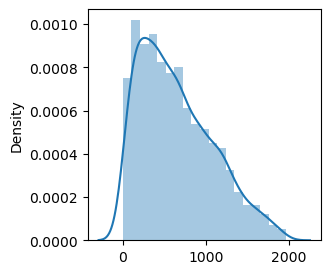

In [ ]:
plt.figure(figsize=(3,3))
sns.distplot(x=data['px_height'])

In [ ]:
# imputing outliers with median because px_height column in not normally distributed
data.loc[(data['px_height']<lower)|(data['px_height']>upper),'px_height']=data['px_height'].median()

In [ ]:
len(data.loc[(data['px_height']<lower)|(data['px_height']>upper)])/len(data)

0.0

In [ ]:
# fc column
q1=data['fc'].quantile(0.25)
q3=data['fc'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
per=len(data.loc[(data['fc']<lower)|(data['fc']>upper)])/len(data)
print("percentage of outliers in fc",per)

percentage of outliers in fc 0.009


<Axes: ylabel='Density'>

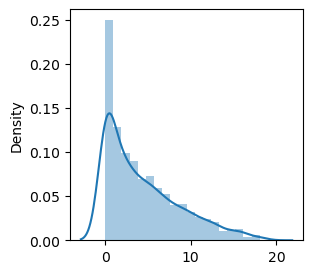

In [ ]:
plt.figure(figsize=(3,3))
sns.distplot(x=data['fc'])

In [ ]:
# imputing outliers with median because fc column in not normally distributed
data.loc[(data['fc']<lower)|(data['fc']>upper),'fc']=data['fc'].median()

In [ ]:
len(data.loc[(data['fc']<lower)|(data['fc']>upper)])/len(data)

0.0

#### CHECKING CORRUPTED VALUES


* From EDA it is observed that,in the numerical columns there are 4 columns ('fc', 'pc', 'px_height', 'sc_w') whch have few 0 entries.
* However, the variables "front camera"(fc), "primary camera"(pc) having 0 as an entry can bes assumed that the mobile doesn't have front/rear camera.
* But the other two variables "pixel height"(pc_height) and "screen_width"(sc_w) can't have 0 as their values.
* Hence, these must be marked as corrupted.

* Let us see if everything is fine with the "front camera (fc)" and "primary camera (pc)" columns.

In [ ]:
print(len(data.loc[(data["four_g"]==1) & (data["pc"]==0)]))


59


* 4G mobiles without primary camera, which is generally not the case.

In [ ]:
print(len(data.loc[(data["touch_screen"]==1) & (data["pc"]==0)]))


51


* touch screen phones without primary camera, is not possible.

* From above two observations its proved that pc also has 0 as corrupted values

<Axes: ylabel='Density'>

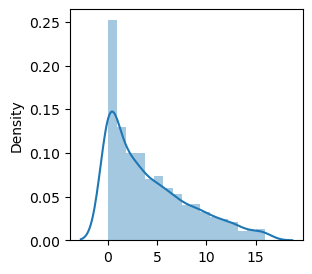

In [ ]:
#fc
plt.figure(figsize=(3,3))
sns.distplot(x=data['fc'])

In [ ]:
len(data.loc[data['fc']==0])/len(data)

0.237

 * approx 23% records has 0 value in fc column
 * so keeping it as it is

<Axes: ylabel='Density'>

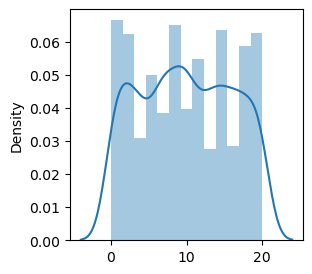

In [ ]:
#pc
plt.figure(figsize=(3,3))
sns.distplot(x=data['pc'])

In [ ]:
len(data.loc[data['pc']==0])/len(data)

0.0505

In [ ]:
# primary camera column is not normally distributed
#Imputing missing value with median
data.loc[data['pc']==0, 'pc']=data['pc'].median()

In [ ]:
len(data.loc[data['pc']==0])/len(data)

0.0

<Axes: ylabel='Density'>

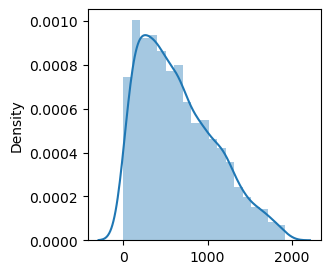

In [ ]:
#'px_height'
plt.figure(figsize=(3,3))
sns.distplot(x=data['px_height'])

In [ ]:
len(data.loc[data['px_height']==0])/len(data)

0.001

In [ ]:
# px_height column is not normally distributed
#Imputing missing value with median
data.loc[data['px_height']==0, 'px_height']=data['px_height'].median()

In [ ]:
len(data.loc[data['px_height']==0])/len(data)

0.0

<Axes: ylabel='Density'>

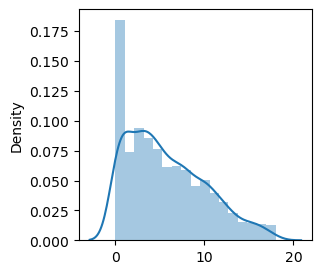

In [ ]:
#'sc_w'
plt.figure(figsize=(3,3))
sns.distplot(x=data['sc_w'])

In [ ]:
len(data.loc[data['sc_w']==0])/len(data)

0.09

In [ ]:
# sc_w column is not normally distributed
# in this column percentage of corrupted values are greater than 5 % but screen width can not be zero so handling it.
# Imputing corrupt value with median because column is not normally distributed
data.loc[data['sc_w']==0, 'sc_w']=data['sc_w'].median()

In [ ]:
len(data.loc[data['sc_w']==0])/len(data)

0.0

## **SCALING**

In [ ]:

con_cols=data[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
con_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.17700,4.150094,0.0,1.00,3.0,7.00,16.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,10.42150,5.617171,1.0,6.00,10.0,15.00,20.0
px_height,2000.0,644.28150,441.386588,1.0,284.00,564.0,945.25,1920.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]=scale.fit_transform(data[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']])

## FEATURE ENGINEERING 

<Axes: >

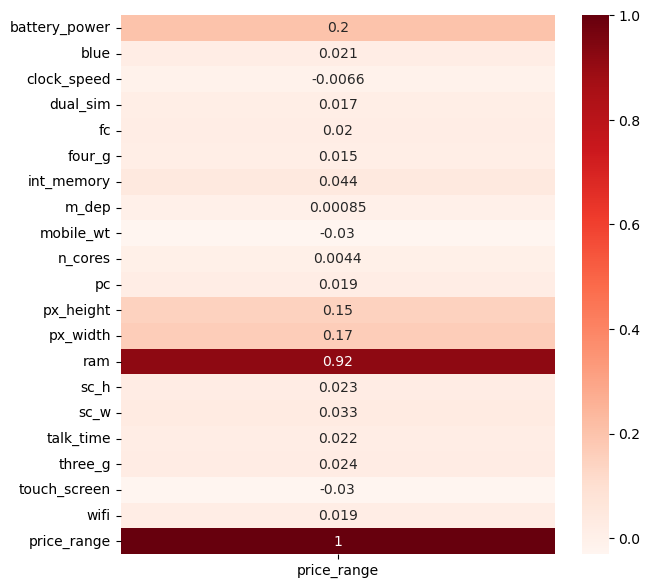

In [ ]:
target=data.corr()[['price_range']]
plt.figure(figsize=(7,7))
sns.heatmap(target,annot=True,cmap='Reds')

**ram, pixel_height, pixel_width, battery power, these are some featues which affects on cell phone price**

**clock_speed, m_dep, touch_screen, mobile_wt has very less corelation with target**

## TRAIN -TEST SPLIT 

In [ ]:
x=data.drop('price_range',axis=1)
y=data['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

## MODEL CREATION

## **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(multi_class='multinomial')
LR_model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
LR_pred=LR_model.predict(x_test)
LR_pred


array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 2, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 1, 2, 0, 1, 3, 2, 2, 3, 1, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 2, 0, 2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 1, 1, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

## EVALUATION


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print("Testing Accuracy",accuracy_score(y_test,LR_pred))


Testing Accuracy 0.9425


In [ ]:
train_pred=LR_model.predict(x_train)
train_pred

array([1, 3, 1, ..., 2, 3, 1], dtype=int64)

In [ ]:
print("Training Accuracy",accuracy_score(y_train,train_pred))

Training Accuracy 0.934375


In [ ]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.91      0.95      0.92        91
           2       0.92      0.84      0.88        92
           3       0.95      0.97      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



## HYPERPARAMETER TUNING

In [ ]:
param={'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
'penalty' : ['l1','l2'],
'C' : [100, 10, 1.0, 0.1, 0.01]}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LR_model, param, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_
best_params

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
LR_model=LogisticRegression(multi_class='multinomial',C= 100, penalty= 'l2', solver= 'lbfgs')
LR_model.fit(x_train,y_train)

LogisticRegression(C=100, multi_class='multinomial')

In [ ]:
LR_pred=LR_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print("Testing Accuracy",accuracy_score(y_test,LR_pred))


Testing Accuracy 0.975


In [ ]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.95      1.00      0.97        91
           2       0.98      0.96      0.97        92
           3       0.97      0.98      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400



## **SVM**

In [ ]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [ ]:
svc_pred=clf.predict(x_test)



## EVALUATION


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print("Testing Accuracy",accuracy_score(y_test,svc_pred))


Testing Accuracy 0.8625


In [ ]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.81      0.87      0.84        91
           2       0.75      0.78      0.77        92
           3       0.93      0.85      0.89       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



## HYPERPARAMETER TUNING

In [ ]:
#HyperParameter tuning
from sklearn.model_selection import GridSearchCV
#hyperparameter range
param_grid={'C':[0.1,5,10,50,60],'gamma':[1,0.1,0.01,0.001,0.0001],'random_state':list(range(1,10))}
model=SVC()
grid=GridSearchCV(model,param_grid,verbose=2,scoring='accuracy',cv=5)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.1s
[CV] END .....................C=0.1, gamma=1,

[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.3s
[CV] END ..................C

[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.2s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.2s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.1s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.2s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.2s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.2s
[CV] END ................C=0

[CV] END .....................C=5, gamma=0.1, random_state=8; total time=   0.1s
[CV] END .....................C=5, gamma=0.1, random_state=8; total time=   0.1s
[CV] END .....................C=5, gamma=0.1, random_state=8; total time=   0.1s
[CV] END .....................C=5, gamma=0.1, random_state=8; total time=   0.1s
[CV] END .....................C=5, gamma=0.1, random_state=8; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.2s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.1s
[CV] END ...................

[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.4s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.3s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.1s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.1s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.2s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.2s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.3s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.4s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.3s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.3s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.2s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.2s
[CV] END ..................C

[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.3s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.3s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.2s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.3s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.2s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.2s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.2s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.2s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.2s
[CV] END ..................C

[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.2s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.2s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.2s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.3s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.2s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.2s
[CV] END ......................C=50, gamma=1, random_state=9; total time=   0.3s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.1s
[CV] END ....................C=50, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.2s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=2; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.2s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=3; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.1s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.1s
[CV] END ..................C

[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.2s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.2s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.2s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.3s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.1s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.1s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.1s
[CV] END .................C=60, gamma=0.0001, random_state=9; total time=   0.1s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=2)

In [ ]:
print(grid.best_params_)

{'C': 60, 'gamma': 0.01, 'random_state': 1}


In [ ]:
svc_model=SVC(C=60,gamma=0.01,random_state=1,probability=True)
svc_model.fit(x_train,y_train)

SVC(C=60, gamma=0.01, probability=True, random_state=1)

In [ ]:
svc_pred=svc_model.predict(x_test)

In [ ]:
accuracy_score(y_test,svc_pred)

0.9625

In [ ]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.92      1.00      0.96        91
           2       0.95      0.93      0.94        92
           3       0.98      0.96      0.97       112

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



## **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred=tree_model.predict(x_test)

In [ ]:
print("Accuracy",accuracy_score(y_test,dt_pred))


Accuracy 0.8325


In [ ]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        98
           1       0.81      0.76      0.78        98
           2       0.73      0.76      0.74        88
           3       0.90      0.87      0.89       116

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
from sklearn.model_selection import GridSearchCV
param={
    'criterion':('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':[2,3,4],
    'min_samples_leaf':(list(range(1,20)))
}

## HYPERPARAMETER TUNING

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, param, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 11, 'min_samples_split': 2, 'splitter': 'best'})


In [ ]:
tree_clf=DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_leaf= 11, min_samples_split=2, splitter='best')
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=11)

In [ ]:
dt_pred=tree_clf.predict(x_test)

In [ ]:
print("Testing Accuracy",accuracy_score(y_test,dt_pred))


Testing Accuracy 0.835


In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       105
           1       0.73      0.82      0.77        91
           2       0.74      0.79      0.76        92
           3       0.92      0.88      0.90       112

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.85      0.83      0.84       400



## **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_cls=RandomForestClassifier()
rfc_cls.fit(x_train,y_train)
rf_pred=rfc_cls.predict(x_test)

In [ ]:
accuracy_score(y_test,rf_pred)

0.8775

In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.85      0.81      0.83        91
           2       0.77      0.85      0.81        92
           3       0.94      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



## HYPERPARAMETER TUNING

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

In [ ]:
grid_search = GridSearchCV(rfc_cls, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
rfc_cls=RandomForestClassifier()
rfc_cls.fit(x_train,y_train)
rf_pred=rfc_cls.predict(x_test)

In [ ]:
accuracy_score(y_test,rf_pred)

0.8625

In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.86      0.85      0.85        91
           2       0.75      0.83      0.78        92
           3       0.91      0.83      0.87       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



## **BAGGING CLASSIFIER**

In [ ]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(base_estimator=LR_model,n_estimators=200)

model_bagg.fit(x_train,y_train)

bag_pred=model_bagg.predict(x_test)


In [ ]:
accuracy_score(y_test,bag_pred)

0.9725

In [ ]:
print(classification_report(y_test,bag_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.94      1.00      0.97        91
           2       0.98      0.96      0.97        92
           3       0.97      0.98      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



## **XGBOOST CLASSIFIER**

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
xgb_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,xgb_pred)

0.905

In [ ]:
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       103
           1       0.93      0.86      0.89        99
           2       0.86      0.86      0.86        92
           3       0.89      0.94      0.92       106

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.90       400



## HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rcv.fit(x_train,y_train)
cv_best_param=rcv.best_params_
print("best parameters ",cv_best_param)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
best parameters  {'reg_lambda': 3.2, 'reg_alpha': 0.1, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.4}


In [ ]:
XGB2=XGBClassifier(reg_lambda= 3.2, reg_alpha= 0.1, n_estimators=50, max_depth=6,
                   learning_rate=0.2, gamma=0.4)
XGB2.fit(x_train, y_train)#training
xgb_pred=XGB2.predict(x_test)#testing


In [ ]:
accuracy_score(y_test,xgb_pred)

0.895

In [ ]:
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       106
           1       0.92      0.85      0.88        99
           2       0.82      0.84      0.83        89
           3       0.88      0.93      0.91       106

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



## CHECKING ROC/AUC SCORE

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
models=[LR_model,svc_model,tree_model,rfc_cls,model_bagg,XGB2]
prediction=[LR_pred,svc_pred,dt_pred,rf_pred,bag_pred,xgb_pred]

for pred,model in zip(prediction,models):
    pred_prob=model.predict_proba(x_test)

    print("Model Name:",model)

    print("\nROC Score:",roc_auc_score(y_test,pred_prob,multi_class='ovr'))
    print("*******************************")

Model Name: LogisticRegression(C=100, multi_class='multinomial')

ROC Score: 0.9997449659245491
*******************************
Model Name: SVC(C=60, gamma=0.01, probability=True, random_state=1)

ROC Score: 0.998059916932827
*******************************
Model Name: DecisionTreeClassifier()

ROC Score: 0.8860295244646645
*******************************
Model Name: RandomForestClassifier()

ROC Score: 0.9805860205950845
*******************************
Model Name: BaggingClassifier(base_estimator=LogisticRegression(C=100,
                                                    multi_class='multinomial'),
                  n_estimators=200)

ROC Score: 0.9996687782422133
*******************************
Model Name: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              g

## MODEL COMPARISON

In [ ]:

models=['LogisticRegression','SVM','DecisionTree','RandomForest','BaggingClassifier','XGBoost']
prediction=[LR_pred,svc_pred,dt_pred,rf_pred,bag_pred,xgb_pred]
accuracy=[]
for p in prediction:
    accuracy.append(accuracy_score(y_test,p))

accuracy_df=pd.DataFrame({'Model':models,'Accuracy':accuracy})

In [ ]:
accuracy_df

,Model,Accuracy
0,LogisticRegression,0.9750
1,SVM,0.9625
2,DecisionTree,0.8350
3,RandomForest,0.8625
4,BaggingClassifier,0.9725
5,XGBoost,0.8950


<Axes: xlabel='Model', ylabel='Accuracy'>

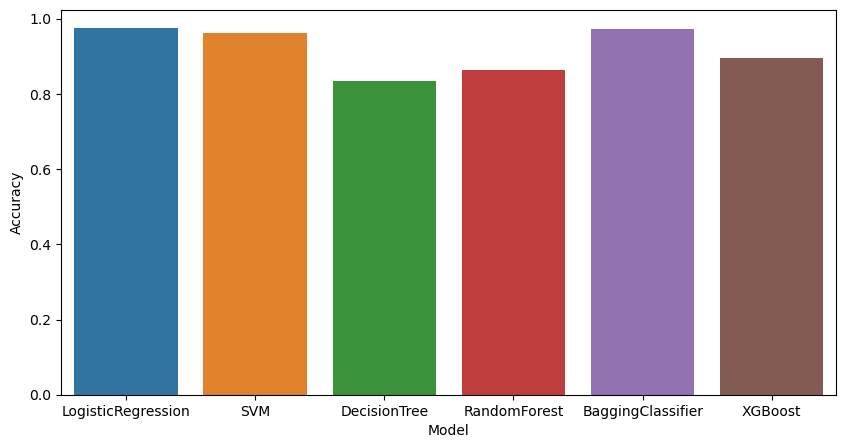

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=accuracy_df['Model'],y=accuracy_df['Accuracy'])

## FEATURE IMPORTANCE 

**USING LOGISTIC REGRESSION ALOGRITHM**

In [ ]:

feature_names = data.columns.tolist()
coefficients = LR_model.coef_
f_name=[]
coef_list=[]
for feature_name,coef in zip(feature_names,coefficients[0]):
    f_name.append(feature_name)
    coef_list.append(abs(coef))



In [ ]:
feature_importance=pd.DataFrame({'feature_names':f_name,'coefficients':coef_list})
feature_importance.sort_values(by=['coefficients'], ascending=False,inplace=True)

<Axes: xlabel='coefficients', ylabel='feature_names'>

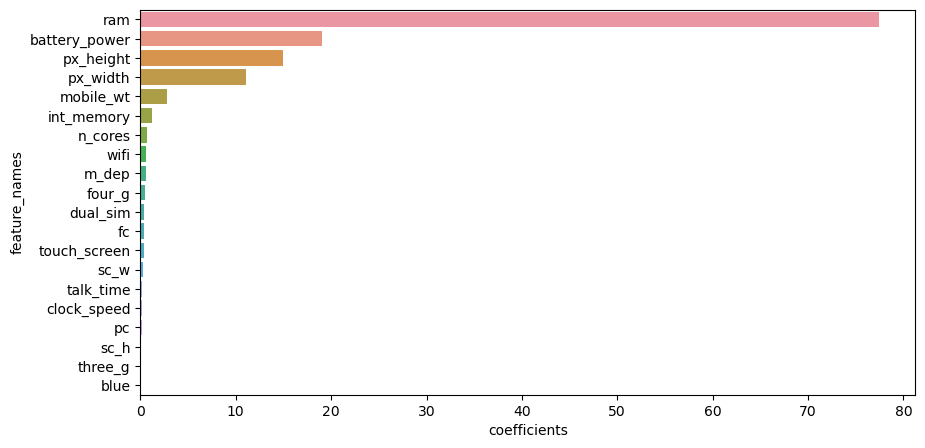

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_importance['feature_names'],x=feature_importance['coefficients'].sort_values())

**USING DECISION TREE ALGORITHM**

In [ ]:
feature_names = data.columns.tolist()
feature_score = tree_model.feature_importances_
f_name=[]
f_score_list=[]
for feature_name,f_score in zip(feature_names,feature_score):
    f_name.append(feature_name)
    f_score_list.append(abs(f_score))

In [ ]:
feature_importance=pd.DataFrame({'feature_names':f_name,'importance':f_score_list})
feature_importance.sort_values(by=['importance'], ascending=False,inplace=True)

<Axes: xlabel='importance', ylabel='feature_names'>

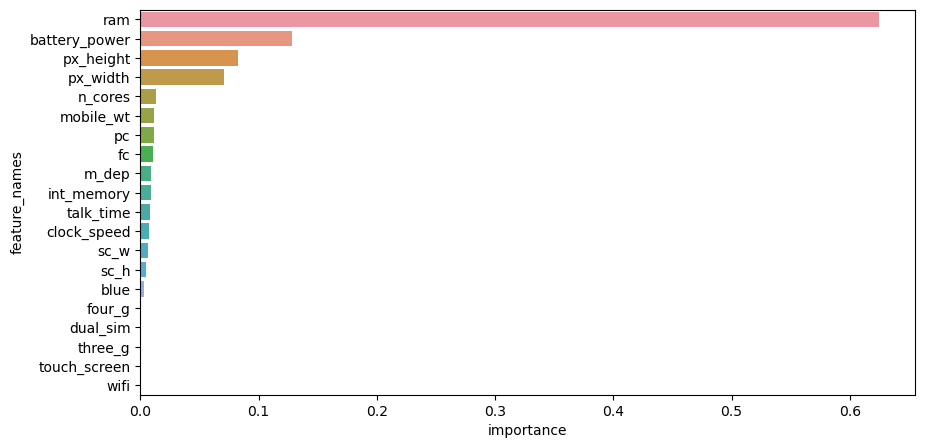

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_importance['feature_names'],x=feature_importance['importance'].sort_values())

**USING RANDOM FOREST ALGORITHM**

In [ ]:
feature_names = data.columns.tolist()
feature_score = rfc_cls.feature_importances_
f_name=[]
f_score_list=[]
for feature_name,f_score in zip(feature_names,feature_score):
    f_name.append(feature_name)
    f_score_list.append(abs(f_score))

In [ ]:
feature_importance=pd.DataFrame({'feature_names':f_name,'importance':f_score_list})
feature_importance.sort_values(by=['importance'], ascending=False,inplace=True)

<Axes: xlabel='importance', ylabel='feature_names'>

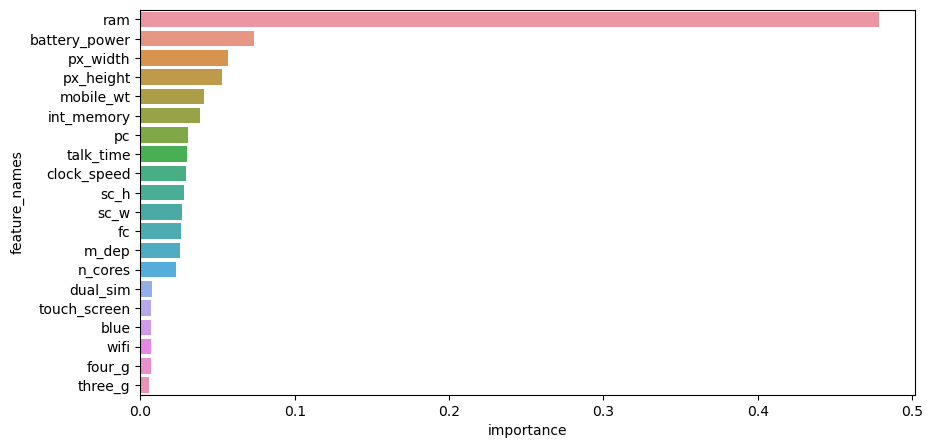

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_importance['feature_names'],x=feature_importance['importance'].sort_values())

**USING  XGBOOST ALGORITHM**

In [ ]:
feature_names = data.columns.tolist()
feature_score = XGB2.feature_importances_
f_name=[]
f_score_list=[]
for feature_name,f_score in zip(feature_names,feature_score):
    f_name.append(feature_name)
    f_score_list.append(abs(f_score))

In [ ]:
feature_importance=pd.DataFrame({'feature_names':f_name,'importance':f_score_list})
feature_importance.sort_values(by=['importance'], ascending=False,inplace=True)

<Axes: xlabel='importance', ylabel='feature_names'>

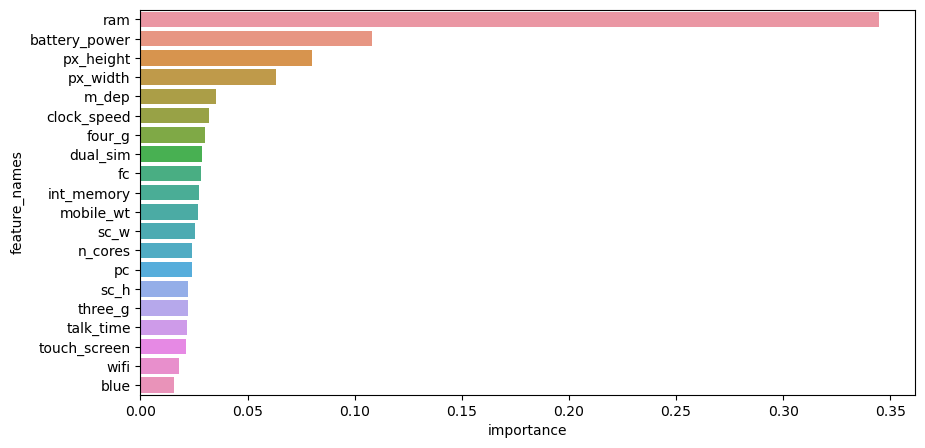

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_importance['feature_names'],x=feature_importance['importance'].sort_values())

### **RESULT:**  **FOR ALL TOP ALGORITHMS ram, battery_power, px_height, px_width are strong features.**